# Comprehensive Analysis of MBPP Dataset

### Introduction

This notebook provides an in-depth analysis of the MBPP dataset.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import radon.complexity as complexity
import radon.metrics as metrics
import radon.visitors as visitors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

file_path = 'data/mbpp.jsonl'
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

print("Dataset Information:")
print(df.info())
print("\nFirst few entries:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 974 non-null    object
 1   code                 974 non-null    object
 2   task_id              974 non-null    int64 
 3   test_setup_code      974 non-null    object
 4   test_list            974 non-null    object
 5   challenge_test_list  974 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.8+ KB
None

First few entries:
                                                text  \
0  Write a function to find the minimum cost path...   
1  Write a function to find the similar elements ...   
2  Write a python function to identify non-prime ...   
3  Write a function to find the largest integers ...   
4  Write a function to find the number of ways to...   

                                                code  task_id test_set

## Distribution of problem descriptions by length

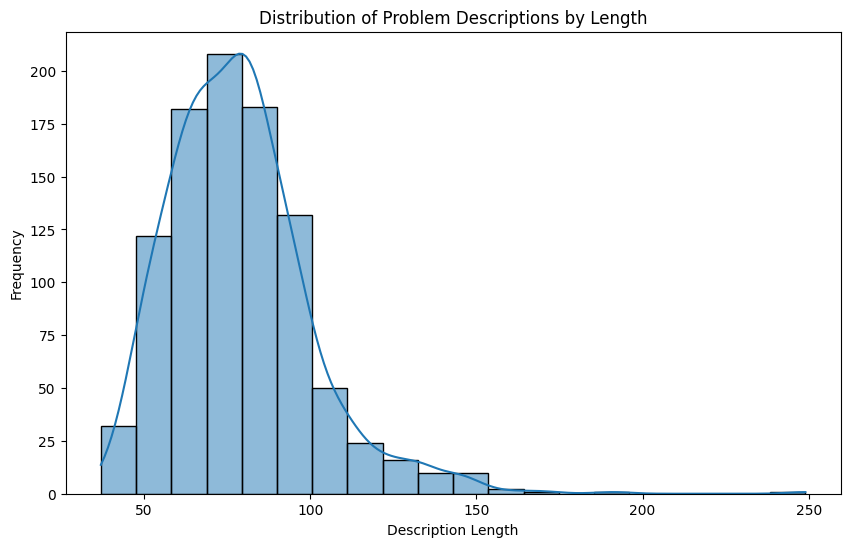

In [2]:
df['description_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=20, kde=True)
plt.title('Distribution of Problem Descriptions by Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

## Distribution of code solutions by length

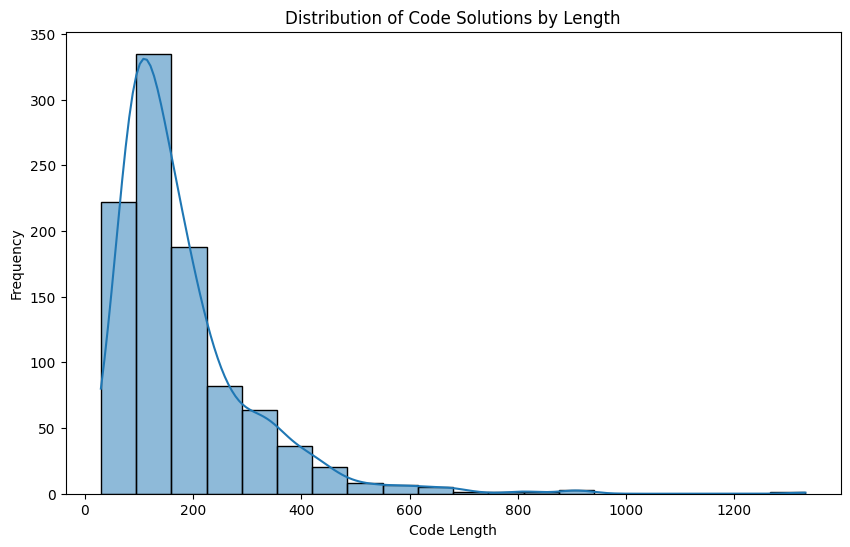

In [3]:
df['code_length'] = df['code'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['code_length'], bins=20, kde=True)
plt.title('Distribution of Code Solutions by Length')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.show()

## Common keywords in problem descriptions

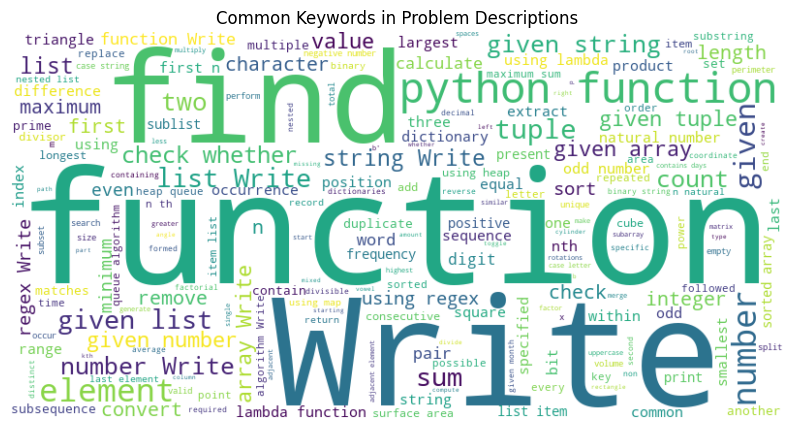

In [4]:
desc_text = " ".join(df['text'])
desc_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(desc_text)
plt.figure(figsize=(10, 6))
plt.imshow(desc_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Problem Descriptions')
plt.show()

## Common keywords in code solutions

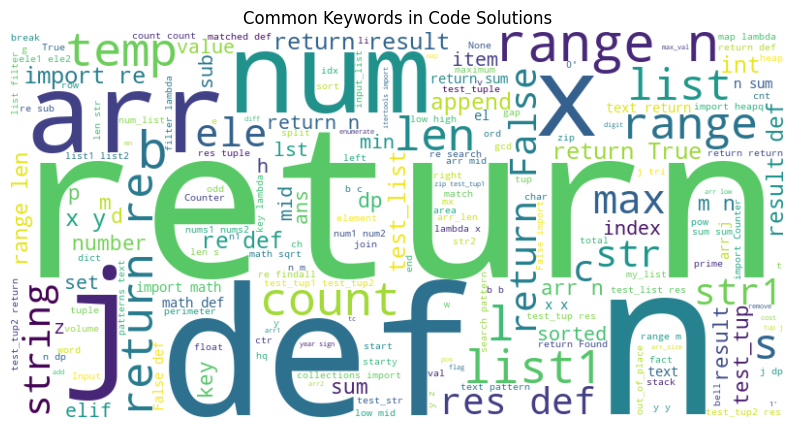

In [5]:
code_text = " ".join(df['code'])
code_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(code_text)
plt.figure(figsize=(10, 6))
plt.imshow(code_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Code Solutions')
plt.show()

## Code complexity analysis

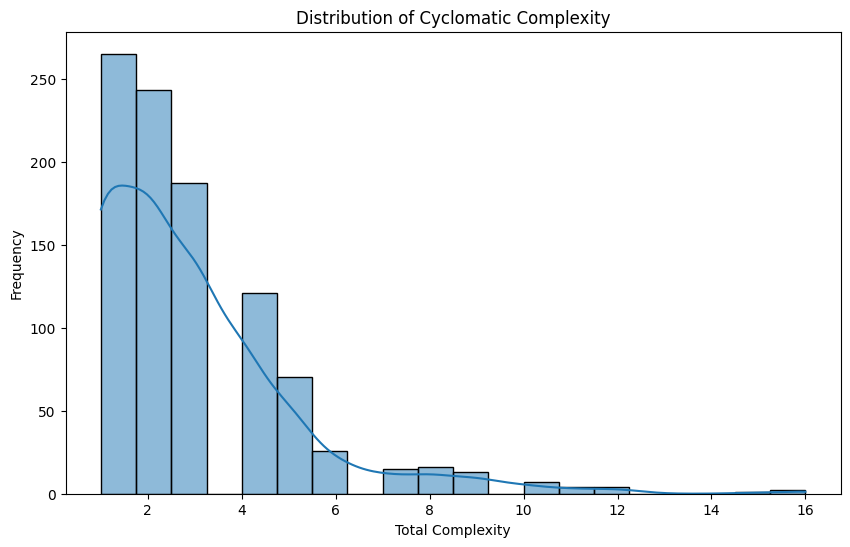

In [6]:
df['cyclomatic_complexity'] = df['code'].apply(lambda x: complexity.cc_visit(x))
df['lines_of_code'] = df['code'].apply(lambda x: len(x.split('\n')))
df['total_complexity'] = df['cyclomatic_complexity'].apply(lambda x: sum(item.complexity for item in x))
plt.figure(figsize=(10, 6))
sns.histplot(df['total_complexity'], bins=20, kde=True)
plt.title('Distribution of Cyclomatic Complexity')
plt.xlabel('Total Complexity')
plt.ylabel('Frequency')
plt.show()

## Test case analysis

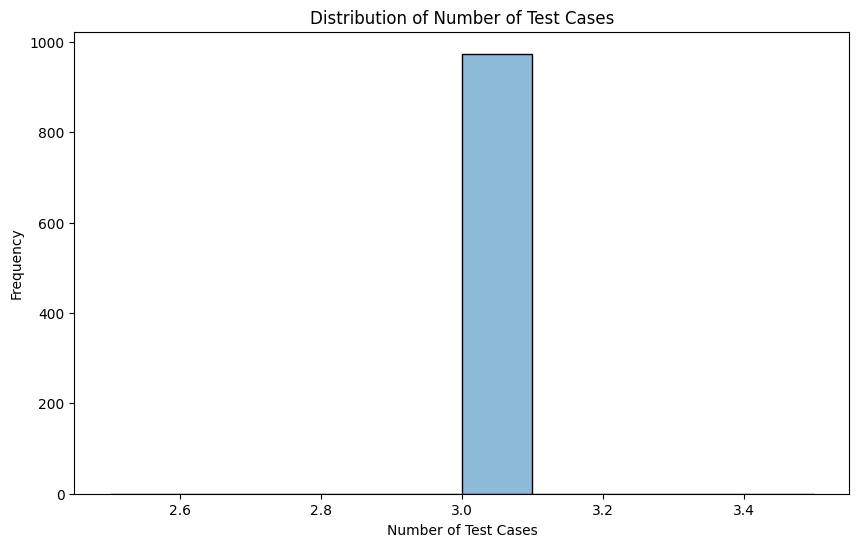

In [7]:
df['num_test_cases'] = df['test_list'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['num_test_cases'], bins=10, kde=True)
plt.title('Distribution of Number of Test Cases')
plt.xlabel('Number of Test Cases')
plt.ylabel('Frequency')
plt.show()

## Insights extraction

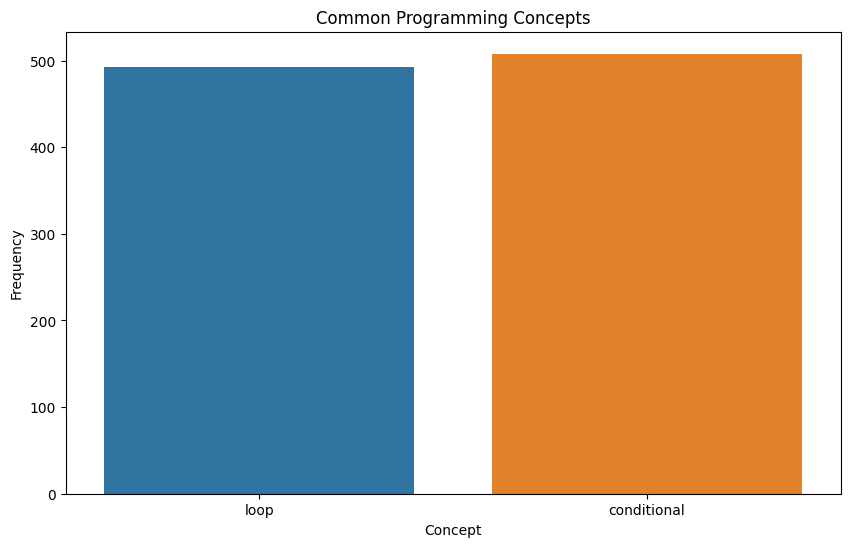

In [8]:
concepts = []
for code in df['code']:
    if 'for' in code:
        concepts.append('loop')
    if 'if' in code:
        concepts.append('conditional')
concepts_count = Counter(concepts)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(concepts_count.keys()), y=list(concepts_count.values()))
plt.title('Common Programming Concepts')
plt.xlabel('Concept')
plt.ylabel('Frequency')
plt.show()

## Clustering of tasks based on description similarity

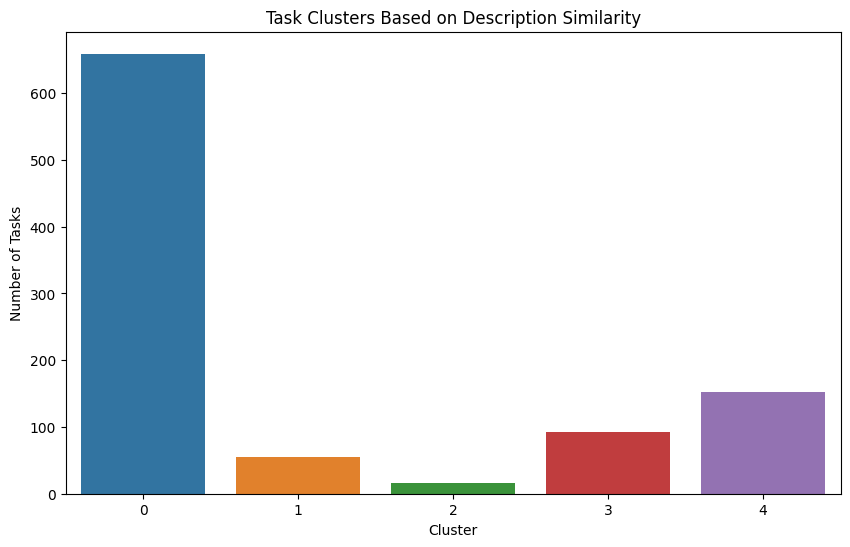

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Task Clusters Based on Description Similarity')
plt.xlabel('Cluster')
plt.ylabel('Number of Tasks')
plt.show()

## Time complexity estimation

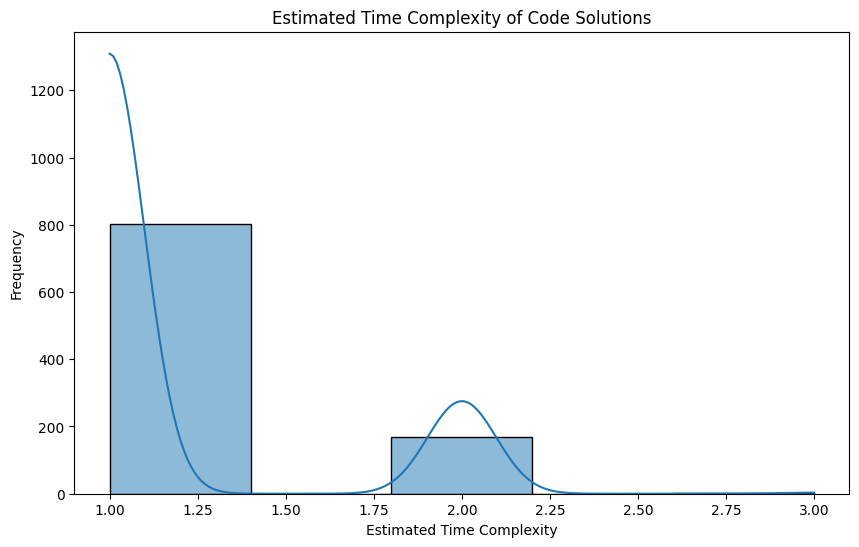

In [10]:
def estimate_time_complexity(code):
    complexity_score = 1
    if 'for' in code and 'for' in code.split('for', 1)[1]:
        complexity_score += 1
    if 'while' in code and 'while' in code.split('while', 1)[1]:
        complexity_score += 1
    if any(keyword in code for keyword in ['recursion', 'recursive', 'recur']):
        complexity_score += 2
    return complexity_score

df['estimated_time_complexity'] = df['code'].apply(estimate_time_complexity)
plt.figure(figsize=(10, 6))
sns.histplot(df['estimated_time_complexity'], bins=5, kde=True)
plt.title('Estimated Time Complexity of Code Solutions')
plt.xlabel('Estimated Time Complexity')
plt.ylabel('Frequency')
plt.show()

## Code readability and maintainability metrics

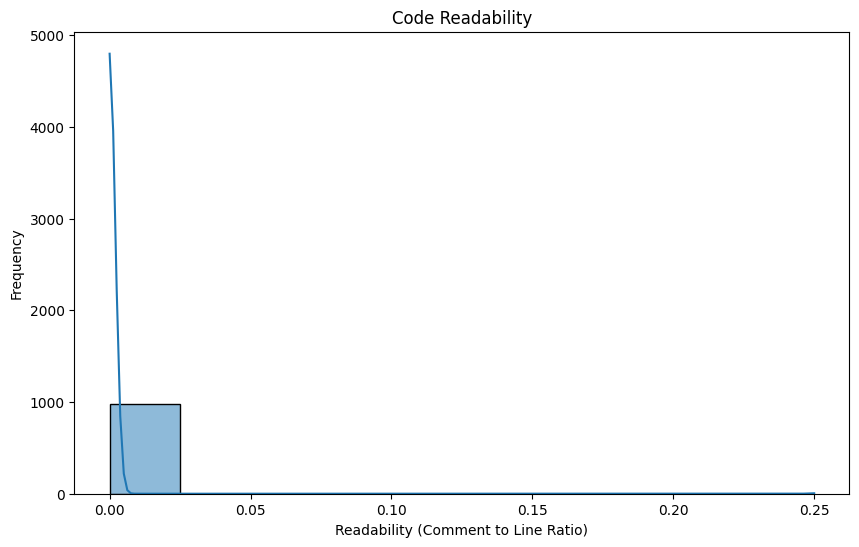

In [11]:
def calculate_readability(code):
    lines = code.split('\n')
    num_comments = sum(1 for line in lines if line.strip().startswith('#'))
    return num_comments / len(lines) if lines else 0

df['readability'] = df['code'].apply(calculate_readability)
plt.figure(figsize=(10, 6))
sns.histplot(df['readability'], bins=10, kde=True)
plt.title('Code Readability')
plt.xlabel('Readability (Comment to Line Ratio)')
plt.ylabel('Frequency')
plt.show()

### Summary of Findings:
1. The dataset contains a diverse set of problems with varying lengths of descriptions and solutions.
2. Code complexity analysis reveals a range of complexities across tasks.
3. Common programming concepts include loops and conditionals.
4. Tasks can be clustered based on description similarity, revealing potential areas of focus for learners.
5. Estimated time complexity analysis shows a majority of tasks have manageable complexity, but some are significantly more complex.
6. Code readability varies, with some solutions having higher comment-to-code ratios, indicating better documentation.

### Conclusion:
This in-depth analysis of the MBPP dataset provides valuable insights into the nature of the problems and their solutions. The analysis helps identify common programming patterns, assess solution complexity, and evaluate code quality. These insights can be used to improve the dataset, guide learners in their studies, and inform the design of future programming challenges. Potential improvements include adding more varied test cases, enhancing problem descriptions, and providing feedback on code readability.